# Fuerzas de ligadura | Máquina de Atwood compuesta

[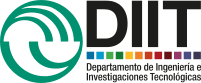](https://ingenieria.unlam.edu.ar/)    
[by-nc-sa_80x15.png](https://creativecommons.org/licenses/by-sa/4.0/deed.es_ES) 
2021 [Víctor A. Bettachini](mailto:vbettachini@unlam.edu.ar)  

---

## Enunciado
Utilice el sistema de coordenadas indicadas.
Para este sistema de poleas determine: 
1. las ecuaciones de movimiento,
2. y las tensiones de ambas cuerdas utilizando el método de multiplicadores de Lagrange.

![Máquina de Atwood compuesta por dos poleas](figuras/marion_fig7_6.png)

## Análisis del problema
- Coordenadas generalizadas  
Si tomo la sugerencia de la figura podemos limitarnos a las coordenadas generalizadas indicadas como $x,y$.
Pero por uniformidad utilizaré todas $y_i$ con $i$ el del número de masa colgante o $p$ para la polea:
    - $y_1$ e $y_p$ se miden desde la posición vertical del centro de la polea superior,
    - $y_2$ e $y_3$ desde la posición vertical del centro de la polea inferior.
- Ligaduras:  
$$
y_1 + y_p + \pi R = l_1,
$$
e 
$$
y_2 + y_3 + \pi R = l_2,
$$
siendo $R$ el radio de las poleas.

## Calculando el Lagrangiano

In [1]:
import sympy as sym # importamos funciones de cálculo simbólico
from sympy.physics import mechanics as mech # de sympy utilizaremos funciones de mecánica
mech.init_vprinting() # notación con punto para la velocidad y punto punto para la aceleración
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Parámetros del sistema
R, m1, m2, m3, mp, g, l1, l2 = sym.symbols('R, m_1, m_2, m_3, m_p, g, l_1, l_2', positive=True)

# Coordenadas generalizadas 
t = sym.symbols('t') # tiempo
y1 = sym.Function('y_1')(t)
y2 = sym.Function('y_2')(t)
y3 = sym.Function('y_3')(t)
yp = sym.Function('y_p')(t)

# Ligaduras
f1 = y1+ yp + sym.pi* R - l1 # ligadura l1 como función homogénea
f2 = y2+ y3 + sym.pi* R - l2 # ligadura l2 como función homogénea
lambda1, lambda2 = sym.symbols('lambda_1, lambda_2')
f1, f2

Y aquí **NO** se aprovechan las ligaduras para reducir el número de coordenadas generalizadas necesarias para describir la dinámica.

In [3]:
# posiciones
N = mech.ReferenceFrame('N')
m1_r = y1* (-N.y)
m2_r = (yp + y2) * (-N.y)
m3_r = (yp + y3)* (-N.y)
mp_r = yp* (-N.y)

### Energía cinética

#### Energía cinética de traslación

In [4]:
# Energía cinética traslación
unMedio = sym.Rational(1,2) # Rational: fracción de enteros
m1_v = m1_r.diff(t, N)
m2_v = m2_r.diff(t, N)
m3_v = m3_r.diff(t, N)
mp_v = mp_r.diff(t, N)
T_traslación = unMedio *( 
    m1* m1_v.dot(m1_v) \
  + m2* m2_v.dot(m2_v) \
  + m3* m3_v.dot(m3_v) \
  + mp* mp_v.dot(mp_v) \
    )
T_traslación

#### Energía cinética de rotación

La energía cinética por la rotación de las poleas es

$$
\frac{I}{2} \omega^2
$$
Puesto que $\omega_i = \dot{\theta}_i = \frac{v_i}{R}$ y $v$ la velocidad tangencial que coincide con la de las masas que cuelgan, se puede escribir esta energía cinética en funcion de la $\dot{y}_i$

$$
\frac{I}{2} \left( \frac{\dot{y}_i}{R} \right)^2,
$$
siendo $R$ el radio de la polea.

Puesto que el montento de inercia de un cilíndro es $I = \frac{M}{2} R^2$, este término para la polea superior es

$$
\frac{I}{2} \dot{\theta_i}^2 = \frac{1}{2} \frac{M}{2} R^2 \left( \frac{\dot{y}_1}{R} \right)^2 = \frac{M}{4} \dot{y}_1^2,
$$
donde uso la coordenada de la masa izquierda $y_1$ en que $\dot{\theta_i}$ sería positivo.

Para la polea inferior
$$
\frac{M}{4} \dot{y}_2^2,
$$
pues uso la coordenada de la masa izquierda inferior $y_2$ en que $\dot{\theta_i}$ sería positivo.

In [5]:
# Energía cinética rotación
T_rotación = unMedio *( 
    mp/2* m1_v.dot(m1_v) \
  + mp/2* m2_v.dot(m2_v) \
    )
T_rotación

In [6]:
T = sym.Eq(sym.Symbol('T'), T_traslación + T_rotación ).simplify() # simplify: simplifica usando factor común y otras operaciones
T

### Energía potencial

In [7]:
# Energía potencial
V = - (g* (-N.y) ).dot( \
         m1* m1_r \
       + m2* m2_r \
       + m3* m3_r \
       + mp* mp_r \
      )
V = sym.Eq(sym.Symbol('V'), V )
V

### Lagrangiano

In [8]:
L = sym.Eq(sym.Symbol('\mathcal{L}'), T.rhs - V.rhs ) # Lagrangiano
L

## Ecuaciones de Euler-Lagrange

Puesto que los momentos generalizados se obtienen de 

$$
p_i = \frac{\partial}{\partial \dot{q_i}} \mathcal{L},
$$
se utiliza esto para dar nombre `dtdp` a la parte de la ecuación de Euler-Lagrange en que

$$\frac{\mathrm{d}}{\mathrm{d}t} \frac{\partial}{\partial \dot{q_i}} \mathcal{L} = \frac{\mathrm{d}}{\mathrm{d}t} p_i$$
se deriva respecto al tiempo el momento generalizado $p_i$.

In [9]:
# derivada total respecto al tiempo de las parciales respecto a cada momento generalizado
y1_dtdp = L.rhs.diff(y1.diff(t)).diff(t) # primero deriva con x punto y luego con
y2_dtdp = L.rhs.diff(y2.diff(t)).diff(t) # primero deriva con x punto y luego con
y3_dtdp = L.rhs.diff(y3.diff(t)).diff(t) # primero deriva con x punto y luego con
yp_dtdp = L.rhs.diff(yp.diff(t)).diff(t) # primero deriva con x punto y luego con

De manera similar el derivar respecto a la coordenada generalizada

$$
\frac{\partial}{\partial q_i} \mathcal{L},
$$
se notara como `dq`.

In [10]:
# derivadas parciales respecto a las coordenadas generalizadas
y1_dq = L.rhs.diff(y1)
y2_dq = L.rhs.diff(y2)
y3_dq = L.rhs.diff(y3)
yp_dq = L.rhs.diff(yp)

Resta obtener las fuerzas generalizadas de ligadura

$$
Q_j = \sum_j \lambda_j \frac{\partial f_j}{\partial q_i}
$$

In [11]:
# fuerzas generalizadas de ligadura
y1_Q = lambda1* f1.diff(y1) + lambda2* f2.diff(y1)
y2_Q = lambda1* f1.diff(y2) + lambda2* f2.diff(y2)
y3_Q = lambda1* f1.diff(y3) + lambda2* f2.diff(y3)
yp_Q = lambda1* f1.diff(yp) + lambda2* f2.diff(yp)

Con todos estos elementos se puede escribir la ecuación homegénea (no hay fuerzas no conservativas)

$$
\frac{\partial}{\partial q_i} \mathcal{L}
- \frac{\mathrm{d}}{\mathrm{d}t} \frac{\partial}{\partial \dot{q}_i} \mathcal{L}
- \sum_j \lambda_j \frac{\partial f_j}{\partial q_i}
= 0
$$

In [12]:
y1_EL = sym.Eq(y1_dq - y1_dtdp - y1_Q, 0) # ecuación igualando a cero
y2_EL = sym.Eq(y2_dq - y2_dtdp - y2_Q, 0)
y3_EL = sym.Eq(y3_dq - y3_dtdp - y3_Q, 0)
yp_EL = sym.Eq(yp_dq - yp_dtdp - yp_Q, 0)
y1_EL.simplify() # para dar un ejemplo la ecuación de Euler-Lagrange para la coordenada de la polea

## Ecuaciones de restricciones debidas a las ligaduras

Las ecuaciones de restricción se pueden diferenciar para obtener dos relaciones adicionales con $\ddot{y}_i$

In [13]:
eq_f1 = sym.Eq(f1.diff(t,2), 0 ) # si no se escribe el cero, se asume
eq_f2 = sym.Eq(f2.diff(t,2), 0 )
eq_f1, eq_f2

In [14]:
ecuacionesOriginales = [
    y1_EL.args[0],
    y2_EL.args[0],
    y3_EL.args[0],
    yp_EL.args[0],
    eq_f1.args[0],
    eq_f2.args[0],
    ]
ecuacionesOriginales = [ecuación.expand() for ecuación in ecuacionesOriginales]

## Resolución del sistema

Probablemente lo primero que se quiera obtener son los coeficientes de Lagrange $\lambda_i$ con los que pueden calcularse las fuerzas generalizadas $Q_i$.

In [15]:
lambda1_sol, lambda2_sol = sym.nonlinsolve(ecuacionesOriginales, [lambda1, lambda2]).args[0]
lambda1_sol, lambda2_sol

Como también se pueden buscar las soluciones para las $\ddot{y}_i$.

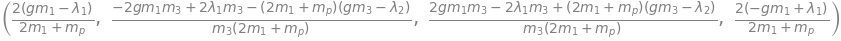

In [16]:
ypp_funciones = [y1.diff(t,2), y2.diff(t,2), y3.diff(t,2), yp.diff(t,2)] # lista de las punto punto 
y1_sol, y2_sol, y3_sol, yp_sol = sym.nonlinsolve(ecuacionesOriginales, ypp_funciones).args[0]
y1_sol, y2_sol.simplify(), y3_sol.simplify(), yp_sol.simplify()

Como estas soluciones están expresadas en función de los $\lambda_j$ es útil, previo a resolver para los $\ddot{y}_i$, substitutir las soluciones en el sistema de ecuaciones.

In [17]:
ecuacionesSinLambdas = [cadaEcuacion.subs([(lambda1, lambda1_sol), (lambda2, lambda2_sol)]) for cadaEcuacion in ecuacionesOriginales] # expand ayuda a la conversión en forma matricial
ecuacionesSinLambdas

Y ahorá si tendremos las aceleraciones generalizadas $\ddot{y}_i$.

In [18]:
y1_sol, y2_sol, y3_sol, yp_sol = sym.nonlinsolve(ecuacionesSinLambdas, ypp_funciones).args[0]

Se puede comprobar que efectivamente $y_1 = -y_p$.

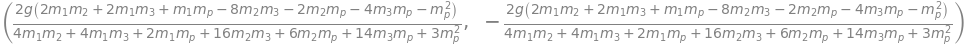

In [19]:
y1_sol, yp_sol

## Fuerzas de ligadura

Finalmente podemos escribir las fuerzas de ligadura

$$
Q_j = \sum_j \lambda_j \frac{\partial f_j}{\partial q_i},
$$
ya que tenemos los $\lambda_j$, y siendo que las restricciones por las ligaduras son

$$
f_1(y_1, y_p) = y_1+ y_p + \pi R - l_1= 0\\
f_2(y_2, y_3) = y_2+ y_3 + \pi R - l_2= 0
$$
los $\frac{\partial f_j}{\partial q_i} =1\,\forall q_i$.
Entonces la fueza generaliza, que no es otra cosa que la tensión, para $Q_1$

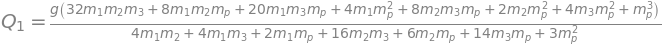

In [20]:
Q1 = sym.Eq(sym.Symbol('Q_1'), lambda1_sol.subs(y1.diff(t,2), y1_sol ) ).simplify() # simplify: simplifica usando factor común y otras operaciones
Q1

Y la tensión de la cuerda inferior $Q_2$

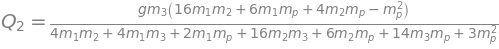

In [21]:
Q2 = sym.Eq(sym.Symbol('Q_2'), lambda2_sol.subs([(yp.diff(t,2), yp_sol ), (y3.diff(t,2), y3_sol )]) ).simplify() # simplify: simplifica usando factor común y otras operaciones
Q2

Recordemos que el signo de los $Q$ es irrelevante, pues son magnitudes escalares.
El signo es algo que se asigna cuando se lo identifica con un vector fuerza de acuerdo a los versores del sistema de coordenadas elegidos.

## Verificando los resultados con análisis matricial

Lamentablemente una modificación en las últimas versiones del módulo `sympy` impide agrupar en matrices los coeficientes de otra cosa que no sean símbolos.
En nuestras ecuaciones las derivadas son funciones de estos símbolos y no se pueden agrupar.

Para salvar la limitación se sustituyen las derivadas segundas en el tiempo con símbolos muleto.

In [22]:
y_1pp, y_2pp, y_3pp, y_ppp = sym.symbols('\ddot{y}_1, \ddot{y}_2, \ddot{y}_3, \ddot{y}_p')
ypp_simbolos = [y_1pp, y_2pp, y_3pp, y_ppp] # símbolos muleto
muletosDiccionario = {
    ypp_funciones[0] : ypp_simbolos[0],
    ypp_funciones[1] : ypp_simbolos[1],
    ypp_funciones[2] : ypp_simbolos[2],
    ypp_funciones[3] : ypp_simbolos[3]
}
muletosDiccionario

In [23]:
ecuaciones = [cadaEcuacion.expand() for cadaEcuacion in ecuacionesOriginales] # expand ayuda a la conversión en forma matricial
ecuacionesMuleto = [cadaEcuacion.subs(muletosDiccionario) for cadaEcuacion in ecuaciones]

In [24]:
A,b = sym.linear_eq_to_matrix(ecuacionesMuleto, ypp_simbolos )
sym.Eq(sym.MatMul(A, sym.Matrix(ypp_simbolos)), b) # esto presenta el sistema como igualdad matricial

⎡      mₚ                                ⎤                                    
⎢-m₁ - ──     0       0          0       ⎥                                    
⎢      2                                 ⎥                                    
⎢                                        ⎥               ⎡       -g⋅m₁ + λ₁   
⎢                mₚ                mₚ    ⎥               ⎢                    
⎢   0      -m₂ - ──   0      -m₂ - ──    ⎥ ⎡\ddot{y}₁⎤   ⎢       -g⋅m₂ + λ₂   
⎢                2                 2     ⎥ ⎢         ⎥   ⎢                    
⎢                                        ⎥ ⎢\ddot{y}₂⎥   ⎢       -g⋅m₃ + λ₂   
⎢   0         0      -m₃        -m₃      ⎥⋅⎢         ⎥ = ⎢                    
⎢                                        ⎥ ⎢\ddot{y}₃⎥   ⎢-g⋅m₂ - g⋅m₃ - g⋅mₚ 
⎢                mₚ                  3⋅mₚ⎥ ⎢         ⎥   ⎢                    
⎢   0      -m₂ - ──  -m₃  -m₂ - m₃ - ────⎥ ⎣\ddot{y}ₚ⎦   ⎢           0        
⎢                2                    2  ⎥          

### Despeje

Aprovechando las relaciones que provienen de $f_1$ y $f_2$ se puede todo a una dependencia de solo dos coordenadas generalizadas: $y_1$ y $y_2$.
Esto es substituir $\ddot{y}_3 = \ddot{y}_2$ e $\ddot{y}_p = -\ddot{y}_1$.  

In [25]:
eqns_sub = [x.subs([(y_3pp, -y_2pp ), (y_ppp, -y_1pp )]) for x in ecuacionesMuleto]
A_sub, b_sub = sym.linear_eq_to_matrix(eqns_sub[:-2], ypp_simbolos[:-2] ) # [:-2] quita los dos últimos
sym.Eq(sym.MatMul(A_sub, sym.Matrix(ypp_simbolos[:-2] ) ), b_sub)

⎡         mₚ                  ⎤                                         
⎢   -m₁ - ──           0      ⎥                                         
⎢         2                   ⎥                                         
⎢                             ⎥               ⎡       -g⋅m₁ + λ₁       ⎤
⎢        mₚ              mₚ   ⎥               ⎢                        ⎥
⎢   m₂ + ──        -m₂ - ──   ⎥ ⎡\ddot{y}₁⎤   ⎢       -g⋅m₂ + λ₂       ⎥
⎢        2               2    ⎥⋅⎢         ⎥ = ⎢                        ⎥
⎢                             ⎥ ⎣\ddot{y}₂⎦   ⎢       -g⋅m₃ + λ₂       ⎥
⎢      m₃             m₃      ⎥               ⎢                        ⎥
⎢                             ⎥               ⎣-g⋅m₂ - g⋅m₃ - g⋅mₚ + λ₁⎦
⎢          3⋅mₚ             mₚ⎥                                         
⎢m₂ + m₃ + ────  -m₂ + m₃ - ──⎥                                         
⎣           2               2 ⎦                                         

Si buscamos expresiones de donde despejar los $\lambda_j$, para obtener las fuerzas de ligadura, podemos sumar las mitades del primero y último, y por otro lado del 2.o y 3.o. 

In [26]:
A_lambda = sym.Matrix( [
    unMedio* ( A_sub[0,:] + A_sub[3,:] ),
    unMedio* ( A_sub[1,:] + A_sub[2,:] )
] )

b_lambda = sym.Matrix( [
    unMedio* ( b_sub[0] + b_sub[3] ),
    unMedio* ( b_sub[1] + b_sub[2] )
] )

sym.Eq(sym.MatMul(A_lambda, sym.Matrix(ypp_simbolos[:-2] ) ), b_lambda)

⎡  m₁   m₂   m₃   mₚ    m₂   m₃   mₚ⎤               ⎡  g⋅m₁   g⋅m₂   g⋅m₃   g⋅
⎢- ── + ── + ── + ──  - ── + ── - ──⎥               ⎢- ──── - ──── - ──── - ──
⎢  2    2    2    2     2    2    4 ⎥ ⎡\ddot{y}₁⎤   ⎢   2      2      2      2
⎢                                   ⎥⋅⎢         ⎥ = ⎢                         
⎢   m₂   m₃   mₚ        m₂   m₃   mₚ⎥ ⎣\ddot{y}₂⎦   ⎢         g⋅m₂   g⋅m₃     
⎢   ── + ── + ──      - ── + ── - ──⎥               ⎢       - ──── - ──── + λ₂
⎣   2    2    4         2    2    4 ⎦               ⎣          2      2       

mₚ     ⎤
── + λ₁⎥
       ⎥
       ⎥
       ⎥
       ⎥
       ⎦

Para obtener la dinámica se puede hacer algo similar, pero restando para eliminar las $\lambda_j$.

In [27]:
A_din = sym.Matrix( [
    unMedio* ( A_sub[0,:] - A_sub[3,:] ),
    unMedio* ( A_sub[1,:] - A_sub[2,:] )
] )

b_din = sym.Matrix( [
    unMedio* ( b_sub[0] - b_sub[3] ),
    unMedio* ( b_sub[1] - b_sub[2] )
] )

sym.Eq(sym.MatMul(A_din, sym.Matrix(ypp_simbolos[:-2] ) ), b_din)

⎡  m₁   m₂   m₃        m₂   m₃   mₚ ⎤               ⎡  g⋅m₁   g⋅m₂   g⋅m₃   g⋅
⎢- ── - ── - ── - mₚ   ── - ── + ── ⎥               ⎢- ──── + ──── + ──── + ──
⎢  2    2    2         2    2    4  ⎥ ⎡\ddot{y}₁⎤   ⎢   2      2      2      2
⎢                                   ⎥⋅⎢         ⎥ = ⎢                         
⎢   m₂   m₃   mₚ        m₂   m₃   mₚ⎥ ⎣\ddot{y}₂⎦   ⎢         g⋅m₂   g⋅m₃     
⎢   ── - ── + ──      - ── - ── - ──⎥               ⎢       - ──── + ────     
⎣   2    2    4         2    2    4 ⎦               ⎣          2      2       

mₚ⎤
──⎥
  ⎥
  ⎥
  ⎥
  ⎥
  ⎦

Y de aquí se despejan $\ddot{y}_1$ e $\ddot{y}_2$.

In [28]:
ypp_solve = A_din.solve(b_din)
ypp_solve = [x.simplify() for x in ypp_solve]
sym.Eq(sym.Matrix(ypp_simbolos[:-2] ) , sym.Matrix(ypp_solve ))

              ⎡    ⎛                                                          
              ⎢2⋅g⋅⎝2⋅m₁⋅m₂ + 2⋅m₁⋅m₃ + m₁⋅mₚ - 8⋅m₂⋅m₃ - 2⋅m₂⋅mₚ - 4⋅m₃⋅mₚ - 
              ⎢───────────────────────────────────────────────────────────────
              ⎢                                                               
⎡\ddot{y}₁⎤   ⎢4⋅m₁⋅m₂ + 4⋅m₁⋅m₃ + 2⋅m₁⋅mₚ + 16⋅m₂⋅m₃ + 6⋅m₂⋅mₚ + 14⋅m₃⋅mₚ + 3
⎢         ⎥ = ⎢                                                               
⎣\ddot{y}₂⎦   ⎢          ⎛                                                2⎞  
              ⎢      2⋅g⋅⎝4⋅m₁⋅m₂ - 4⋅m₁⋅m₃ + m₁⋅mₚ + m₂⋅mₚ - 3⋅m₃⋅mₚ - mₚ ⎠  
              ⎢───────────────────────────────────────────────────────────────
              ⎢                                                               
              ⎣4⋅m₁⋅m₂ + 4⋅m₁⋅m₃ + 2⋅m₁⋅mₚ + 16⋅m₂⋅m₃ + 6⋅m₂⋅mₚ + 14⋅m₃⋅mₚ + 3

  2⎞⎤
mₚ ⎠⎥
────⎥
   2⎥
⋅mₚ ⎥
    ⎥
    ⎥
    ⎥
────⎥
   2⎥
⋅mₚ ⎦

Lo que permite verificar que coinciden con los obtenidos de resolver directamente el sistema de ecuaciones.